In [1]:
import numpy as np
import pandas as pd
import metachange
from datetime import datetime
from tqdm import tqdm
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

In [2]:
X = np.array([[0,1]]*500 + [[1,0]]*500 + [[2,0]]*500 + [[2,1]]*500)
t = np.arange(2000)*1./2000

In [3]:
# clf_rf = RandomForestClassifier(max_depth=32, criterion="entropy", random_state=0)
# res_rf = metachange.meta_change_detect_np(X, t, clf_rf)

In [4]:
clf_rf = RandomForestClassifier(max_depth=32, criterion="entropy", random_state=0)
res_multi, res_multi_result = metachange.change_point_tree(X, t, clf_rf, min_range=0.10)

{'t_left': 0.0, 't_right': 0.9995}
trial   0
t0 = 0.5012, alpha = 1.0000
trial   1
t0 = 0.5050, alpha = 1.0000
trial   2
t0 = 0.5016, alpha = 1.0000
t0 = 0.5026 +- 0.0017
alpha = 1.0000 +- 0.0000
ratio =  0.5027513756878439
{'t_left': 0.0, 't_right': 0.5026034047737289}
trial   0
t0 = 0.2547, alpha = 1.0000
trial   1
t0 = 0.2468, alpha = 1.0000
trial   2
t0 = 0.2607, alpha = 1.0000
t0 = 0.2541 +- 0.0057
alpha = 1.0000 +- 0.0000
ratio =  0.5054726368159204
{'t_left': 0.5026034047737289, 't_right': 0.9995}
trial   0
t0 = 0.7476, alpha = 0.9848
trial   1
t0 = 0.7506, alpha = 1.0000
trial   2
t0 = 0.7507, alpha = 1.0000
t0 = 0.7497 +- 0.0015
alpha = 0.9949 +- 0.0072
ratio =  0.4969818913480885
{'t_left': 0.0, 't_right': 0.2540808634322131}
trial   0
t0 = 0.0403, alpha = 0.1388
trial   1
t0 = 0.2473, alpha = 0.4777
trial   2
t0 = 0.2341, alpha = 0.8065
t0 = 0.1739 +- 0.0946
alpha = 0.4743 +- 0.2726
{'t_left': 0.2540808634322131, 't_right': 0.5026034047737289}
trial   0
t0 = 0.3216, alpha = 

In [12]:
print(res_multi_result)

[{'t0_mean': 0.5026034047737289, 't0_std': 0.0017206085097105897, 'alpha_mean': 1.0, 'alpha_std': 0.0}, {'t0_mean': 0.2540808634322131, 't0_std': 0.005725318046218539, 'alpha_mean': 0.9999991665603981, 'alpha_std': 1.1786615884092785e-06}, {'t0_mean': 0.7496696356383822, 't0_std': 0.0014506560670445893, 'alpha_mean': 0.9949293238866529, 'alpha_std': 0.007171018929896822}, {'t0_mean': 0.3678130802122095, 't0_std': 0.08067851907357701, 'alpha_mean': 0.15240989038865485, 'alpha_std': 0.010354036059266216}]


In [24]:
res_multi

{'depth': 0,
 'left': {'depth': 1,
  'left': {'depth': 2,
   'left': None,
   'right': None,
   'data': {'t_left': 0.0, 't_right': 0.2540808634322131}},
  'right': {'depth': 2,
   'left': {'depth': 3,
    'left': None,
    'right': None,
    'data': {'t_left': 0.2540808634322131, 't_right': 0.3678130802122095}},
   'right': {'depth': 3,
    'left': None,
    'right': None,
    'data': {'t_left': 0.3678130802122095, 't_right': 0.5026034047737289}},
   'data': {'t_left': 0.2540808634322131,
    't_right': 0.5026034047737289,
    't0': 0.3678130802122095,
    'ratio': 0.4567404426559356,
    'alpha': 0.15240989038865485,
    'res': [{'lbd': [0.27704545454545454,
       0.2995909090909091,
       0.3221363636363636,
       0.34468181818181814,
       0.3672272727272727,
       0.38977272727272727,
       0.4123181818181818,
       0.43486363636363634,
       0.4574090909090909,
       0.4799545454545454],
      'acc': [0.9, 0.82, 0.76, 0.68, 0.61, 0.53, 0.58, 0.64, 0.74, 0.87],
      'maj'

In [13]:
## define a funciton which generates node text
def make_node_text(data):
    t_left = data["t_left"]
    t_right = data["t_right"]

    if "t0" in data:
        header = f't_0 = {data["t0"]:.4f}\n alpha = {data["alpha"]:.4f}'
    else:
        header = "Leaf"
    return f"{header}\nRange:{t_left:.4f}-{t_right:.4f}"


tree = metachange.show_tree(res_multi, make_node_text)

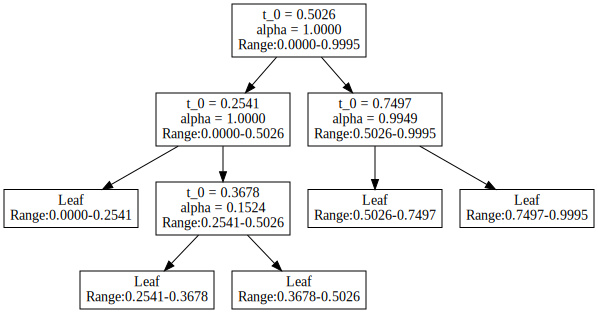

In [15]:
tree

In [19]:
tree_str = tree.source

In [21]:
tree_str

digraph {
	node [shape=box]
	0 [label=root]
	0 [label="t_0 = 0.5026
 alpha = 1.0000
Range:0.0000-0.9995"]
	1 [label=1]
	0 -> 1
	1 [label="t_0 = 0.2541
 alpha = 1.0000
Range:0.0000-0.5026"]
	2 [label=2]
	1 -> 2
	2 [label="Leaf
Range:0.0000-0.2541"]
	3 [label=3]
	1 -> 3
	3 [label="t_0 = 0.3678
 alpha = 0.1524
Range:0.2541-0.5026"]
	4 [label=4]
	3 -> 4
	4 [label="Leaf
Range:0.2541-0.3678"]
	5 [label=5]
	3 -> 5
	5 [label="Leaf
Range:0.3678-0.5026"]
	6 [label=6]
	0 -> 6
	6 [label="t_0 = 0.7497
 alpha = 0.9949
Range:0.5026-0.9995"]
	7 [label=7]
	6 -> 7
	7 [label="Leaf
Range:0.5026-0.7497"]
	8 [label=8]
	6 -> 8
	8 [label="Leaf
Range:0.7497-0.9995"]
}



In [23]:
tree_str

'digraph {\n\tnode [shape=box]\n\t0 [label=root]\n\t0 [label="t_0 = 0.5026\n alpha = 1.0000\nRange:0.0000-0.9995"]\n\t1 [label=1]\n\t0 -> 1\n\t1 [label="t_0 = 0.2541\n alpha = 1.0000\nRange:0.0000-0.5026"]\n\t2 [label=2]\n\t1 -> 2\n\t2 [label="Leaf\nRange:0.0000-0.2541"]\n\t3 [label=3]\n\t1 -> 3\n\t3 [label="t_0 = 0.3678\n alpha = 0.1524\nRange:0.2541-0.5026"]\n\t4 [label=4]\n\t3 -> 4\n\t4 [label="Leaf\nRange:0.2541-0.3678"]\n\t5 [label=5]\n\t3 -> 5\n\t5 [label="Leaf\nRange:0.3678-0.5026"]\n\t6 [label=6]\n\t0 -> 6\n\t6 [label="t_0 = 0.7497\n alpha = 0.9949\nRange:0.5026-0.9995"]\n\t7 [label=7]\n\t6 -> 7\n\t7 [label="Leaf\nRange:0.5026-0.7497"]\n\t8 [label=8]\n\t6 -> 8\n\t8 [label="Leaf\nRange:0.7497-0.9995"]\n}\n'

In [ ]:
split_str = tree_str.split()